# GMM with Errors: Extreme Deconvolution

Bayesian estimation of multivariate densities modeled as mixtures of Gaussians, with data that have measurement error, is known in astronomy as “extreme deconvolution” (XD). As with the Gaussian mixtures, we have already
encountered this situation in one dimension. 

Recall the original mixture of Gaussians, where each data point $x$ is sampled from one of $M$ different Gaussians with given means and variances, ($\mu_i , \sigma_i$), with the weight for each Gaussian being $\alpha_i$ . Thus, the pdf of $x$ is given as:

$$p(x)=\sum_{j} \alpha_j N(x| \mu_j, \Sigma_j)$$

Extreme deconvolution generalizes the EM approach to a case with measurement
errors. More explicitly, one assumes that the noisy observations $x_i$ and the true values
$v_i$ are related throug:

$$x_i=R_i v_i + \epsilon_i$$

where $R_i$ is the so-called projection matrix, which may or may not be invertible. The
noise $\epsilon_i$ is assumed to be drawn from a Gaussian with zero mean and variance $S_i$.
Given the matrices $R_i$ and $S_i$ , the aim of XD is to find the parameters $\mu_i , \sigma_i$ of the underlying Gaussians, and the weights $\alpha_i$ in a way that would maximize the likelihood of the observed data. The EM approach to this problem results in an iterative procedure that converges to (at least) a local maximum of the likelihood. 

The iteration of the EM steps increases the likelihood of the observations $v_i$, given the
model parameters. Thus, iterating until convergence, one obtains a solution that is a
local maximum of the likelihood. This method has been used with success in quasar classification, by estimating the densities of quasar and nonquasar objects from flux measurements; see
https://arxiv.org/abs/1011.6392

Pickle disclaimer: https://docs.python.org/3/library/pickle.html#data-stream-format

  

@pickle_results: computing results and saving to 'XD_toy.pkl'


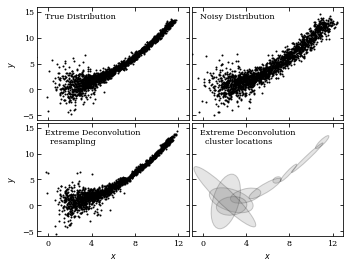

In [ ]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.density_estimation import XDGMM
from astroML.plotting.tools import draw_ellipse

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Sample the dataset
N = 2000
np.random.seed(0)

# generate the true data
x_true = (1.4 + 2 * np.random.random(N)) ** 2
y_true = 0.1 * x_true ** 2

# add scatter to "true" distribution
dx = 0.1 + 4. / x_true ** 2
dy = 0.1 + 10. / x_true ** 2

x_true += np.random.normal(0, dx, N)
y_true += np.random.normal(0, dy, N)

# add noise to get the "observed" distribution
dx = 0.2 + 0.5 * np.random.random(N)
dy = 0.2 + 0.5 * np.random.random(N)

x = x_true + np.random.normal(0, dx)
y = y_true + np.random.normal(0, dy)

# stack the results for computation
X = np.vstack([x, y]).T
Xerr = np.zeros(X.shape + X.shape[-1:])
diag = np.arange(X.shape[-1])
Xerr[:, diag, diag] = np.vstack([dx ** 2, dy ** 2]).T


#------------------------------------------------------------
# compute and save results
@pickle_results("XD_toy.pkl")
def compute_XD_results(n_components=10, max_iter=500):
    clf = XDGMM(n_components, max_iter=max_iter)
    clf.fit(X, Xerr)
    return clf


clf = compute_XD_results(10, 500)
sample = clf.sample(N)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.1, right=0.95,
                    bottom=0.1, top=0.95,
                    wspace=0.02, hspace=0.02)

ax1 = fig.add_subplot(221)
ax1.scatter(x_true, y_true, s=4, lw=0, c='k')

ax2 = fig.add_subplot(222)
ax2.scatter(x, y, s=4, lw=0, c='k')

ax3 = fig.add_subplot(223)
ax3.scatter(sample[:, 0], sample[:, 1], s=4, lw=0, c='k')

ax4 = fig.add_subplot(224)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i], clf.V[i], scales=[2], ax=ax4,
                 ec='k', fc='gray', alpha=0.2)

titles = ["True Distribution", "Noisy Distribution",
          "Extreme Deconvolution\n  resampling",
          "Extreme Deconvolution\n  cluster locations"]

ax = [ax1, ax2, ax3, ax4]

for i in range(4):
    ax[i].set_xlim(-1, 13)
    ax[i].set_ylim(-6, 16)

    ax[i].xaxis.set_major_locator(plt.MultipleLocator(4))
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(5))

    ax[i].text(0.05, 0.95, titles[i],
               ha='left', va='top', transform=ax[i].transAxes)

    if i in (0, 1):
        ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_xlabel('$x$')

    if i in (1, 3):
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_ylabel('$y$')

plt.show()

This deconvolution of measurement errors can also be demonstrated using a real data set. Next igure shows the results of XD when applied to photometric data from the Sloan Digital Sky Survey. The high signal-to-noise data (i.e., small color errors) come from the Stripe 82 Standard Star Catalog, where multiple
observations are averaged to arrive at magnitudes with a smaller scatter (via the
central limit theorem).
The lower signal-to-noise data (top-right panel) are derived from single epoch observations. Though only two dimensions are plotted,
the XD fit is performed on a five-dimensional data set, consisting of the g -band magnitude along with the u − g , g − r , r − i , and i − z colors.

The results of the XD fit to the noisy data are shown in the two middle panels: the
background distribution is fit by a single wide Gaussian, while the remaining clusters
trace the main locus of points. The points drawn from the resulting distribution
have a much tighter scatter than the input data. This decreased scatter can be quantitatively demonstrated by analyzing the width of the locus perpendicular to its long direction using the so-called w color; see http://faculty.washington.edu/ivezic/sdss/catalogs/205821.web.pdf


In [ ]:


   # Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.density_estimation import XDGMM
from astroML.crossmatch import crossmatch
from astroML.datasets import fetch_sdss_S82standards, fetch_imaging_sample
from astroML.plotting.tools import draw_ellipse
from astroML.utils.decorators import pickle_results
from astroML.stats import sigmaG

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# define u-g-r-i-z extinction from Berry et al, arXiv 1111.4985
# multiply extinction by A_r
extinction_vector = np.array([1.810, 1.400, 1.0, 0.759, 0.561])

#----------------------------------------------------------------------
# Fetch and process the noisy imaging data
data_noisy = fetch_imaging_sample()

# select only stars
data_noisy = data_noisy[data_noisy['type'] == 6]

# Get the extinction-corrected magnitudes for each band
X = np.vstack([data_noisy[f + 'RawPSF'] for f in 'ugriz']).T
Xerr = np.vstack([data_noisy[f + 'psfErr'] for f in 'ugriz']).T

# extinction terms from Berry et al, arXiv 1111.4985
X -= (extinction_vector * data_noisy['rExtSFD'][:, None])


#----------------------------------------------------------------------
# Fetch and process the stacked imaging data
data_stacked = fetch_sdss_S82standards()

# cut to RA, DEC range of imaging sample
RA = data_stacked['RA']
DEC = data_stacked['DEC']
data_stacked = data_stacked[(RA > 0) & (RA < 10) &
                            (DEC > -1) & (DEC < 1)]

# get stacked magnitudes for each band
Y = np.vstack([data_stacked['mmu_' + f] for f in 'ugriz']).T
Yerr = np.vstack([data_stacked['msig_' + f] for f in 'ugriz']).T

# extinction terms from Berry et al, arXiv 1111.4985
Y -= (extinction_vector * data_stacked['A_r'][:, None])

# quality cuts
g = Y[:, 1]
mask = ((Yerr.max(1) < 0.05) &
        (g < 20))
data_stacked = data_stacked[mask]
Y = Y[mask]
Yerr = Yerr[mask]


#----------------------------------------------------------------------
# cross-match
#  the imaging sample contains both standard and variable stars.  We'll
#  perform a cross-match with the standard star catalog and choose objects
#  which are common to both.
Xlocs = np.hstack((data_noisy['ra'][:, np.newaxis],
                   data_noisy['dec'][:, np.newaxis]))
Ylocs = np.hstack((data_stacked['RA'][:, np.newaxis],
                   data_stacked['DEC'][:, np.newaxis]))

print("number of noisy points:  ", Xlocs.shape)
print("number of stacked points:", Ylocs.shape)

# find all points within 0.9 arcsec.  This cutoff was selected
# by plotting a histogram of the log(distances).
dist, ind = crossmatch(Xlocs, Ylocs, max_distance=0.9 / 3600)

noisy_mask = (~np.isinf(dist))
stacked_mask = ind[noisy_mask]

# select the data
data_noisy = data_noisy[noisy_mask]
X = X[noisy_mask]
Xerr = Xerr[noisy_mask]

data_stacked = data_stacked[stacked_mask]
Y = Y[stacked_mask]
Yerr = Yerr[stacked_mask]

# double-check that our cross-match succeeded
assert X.shape == Y.shape
print("size after crossmatch:", X.shape)


#----------------------------------------------------------------------
# perform extreme deconvolution on the noisy sample

# first define mixing matrix W
W = np.array([[0, 1, 0, 0, 0],    # g magnitude
              [1, -1, 0, 0, 0],   # u-g color
              [0, 1, -1, 0, 0],   # g-r color
              [0, 0, 1, -1, 0],   # r-i color
              [0, 0, 0, 1, -1]])  # i-z color

X = np.dot(X, W.T)
Y = np.dot(Y, W.T)

# compute error covariance from mixing matrix
Xcov = np.zeros(Xerr.shape + Xerr.shape[-1:])
Xcov[:, range(Xerr.shape[1]), range(Xerr.shape[1])] = Xerr ** 2

# each covariance C = WCW^T
# best way to do this is with a tensor dot-product
Xcov = np.tensordot(np.dot(Xcov, W.T), W, (-2, -1))


#----------------------------------------------------------------------
# This is a long calculation: save results to file
@pickle_results("XD_stellar.pkl")
def compute_XD(n_clusters=12, rseed=0, max_iter=100, verbose=True):
    np.random.seed(rseed)
    clf = XDGMM(n_clusters, max_iter=max_iter, tol=1E-5, verbose=verbose)
    clf.fit(X, Xcov)
    return clf


clf = compute_XD(12)

#------------------------------------------------------------
# Fit and sample from the underlying distribution
np.random.seed(42)
X_sample = clf.sample(X.shape[0])

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(5, 3.75))
fig.subplots_adjust(left=0.12, right=0.95,
                    bottom=0.1, top=0.95,
                    wspace=0.02, hspace=0.02)

# only plot 1/10 of the stars for clarity
ax1 = fig.add_subplot(221)
ax1.scatter(Y[::10, 2], Y[::10, 3], s=9, lw=0, c='k')

ax2 = fig.add_subplot(222)
ax2.scatter(X[::10, 2], X[::10, 3], s=9, lw=0, c='k')

ax3 = fig.add_subplot(223)
ax3.scatter(X_sample[::10, 2], X_sample[::10, 3], s=9, lw=0, c='k')

ax4 = fig.add_subplot(224)
for i in range(clf.n_components):
    draw_ellipse(clf.mu[i, 2:4], clf.V[i, 2:4, 2:4], scales=[2],
                 ec='k', fc='gray', alpha=0.2, ax=ax4)

titles = ["Standard Stars", "Single Epoch",
          "Extreme Deconvolution\n  resampling",
          "Extreme Deconvolution\n  cluster locations"]
ax = [ax1, ax2, ax3, ax4]

for i in range(4):
    ax[i].set_xlim(-0.6, 1.8)
    ax[i].set_ylim(-0.6, 1.8)

    ax[i].xaxis.set_major_locator(plt.MultipleLocator(0.5))
    ax[i].yaxis.set_major_locator(plt.MultipleLocator(0.5))

    ax[i].text(0.05, 0.95, titles[i],
               ha='left', va='top', transform=ax[i].transAxes)

    if i in (0, 1):
        ax[i].xaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_xlabel('$g-r$')

    if i in (1, 3):
        ax[i].yaxis.set_major_formatter(plt.NullFormatter())
    else:
        ax[i].set_ylabel('$r-i$')

#------------------------------------------------------------
# Second figure: the width of the locus
fig = plt.figure(figsize=(5, 3.75))
ax = fig.add_subplot(111)

labels = ['single epoch', 'standard stars', 'XD resampled']
linestyles = ['solid', 'dashed', 'dotted']
for data, label, ls in zip((X, Y, X_sample), labels, linestyles):
    g = data[:, 0]
    gr = data[:, 2]
    ri = data[:, 3]

    r = g - gr
    i = r - ri

    mask = (gr > 0.3) & (gr < 1.0)
    g = g[mask]
    r = r[mask]
    i = i[mask]

    w = -0.227 * g + 0.792 * r - 0.567 * i + 0.05

    sigma = sigmaG(w)

    ax.hist(w, bins=np.linspace(-0.08, 0.08, 100), linestyle=ls,
            histtype='step', label=label + '\n\t' + r'$\sigma_G=%.3f$' % sigma,
            density=True)

ax.legend(loc=2)
ax.text(0.95, 0.95, '$w = -0.227g + 0.792r$\n$ - 0.567i + 0.05$',
        transform=ax.transAxes, ha='right', va='top')

ax.set_xlim(-0.07, 0.07)
ax.set_ylim(0, 55)

ax.set_xlabel('$w$')
ax.set_ylabel('$N(w)$')

plt.show()

IndexError: ignored

In [ ]:
data_noisy[data_noisy['type']==6]

IndexError: ignored

The w color is defined as:

$$w=-0.227g+0.792r-0.567i+0.05$$

and has a zero mean by definition. The lower panel of figure shows a histogram
of the width of the $w$ color in the range $0.3 < g −r < 1.0$ (i.e., along the “blue” part of
the locus where w $has$ a small standard deviation). The noisy data show a spread in $w$
of 0.016 (magnitude), while the extreme deconvolution model reduces this to 0.008,
better reflective of the true underlying distribution. Note that the intrinsic width of
the w color obtained by XD is actually a bit smaller than the corresponding width
for the Standard Star Catalog (0.010) because even the averaged data have residual
random errors. By subtracting 0.008 from 0.010 in quadrature, we can estimate these
errors to be 0.006, in agreement with independent estimates.

Last but not least, XD can gracefully treat cases of missing data: in this case
the corresponding measurement error can be simply set to a very large value (much
larger than the dynamic range spanned by available data). 

# Finding Clusters in Data
“Clustering” in astronomy refers to a number of different aspects of data analysis.
Given a multivariate point data set, we can ask whether it displays any structure,
that is, concentrations of points. Alternatively, when a density estimate is available we can search for “overdensities.” Another way to interpret clustering is to seek a
partitioning or segmentation of data into smaller parts according to some criteria.
In the following section we describe the techniques used for the unsupervised
identification of clusters within point data sets. Again, here “unsupervised” means
that there is no prior information about the number and properties of clusters.

## General Aspects of Clustering and Unsupervised Learning
Finding clusters is sometimes thought of as “black art” since the objective criteria
for it seems more elusive than, say, for a prediction task such as classification (where
we know the true underlying function for at least some subset of the sample). When
we can speak of a true underlying function (as we do in most density estimation,
classification, and regression methods) we mean that we have a score or error
function with which to evaluate the effectiveness of our analysis. Under this model
we can discuss optimization, error bounds, generalization (i.e., minimizing error on
future data), what happens to the error as we get more data, etc. In other words we
can leverage all the powerful tools of statistics we have discussed previously.

## Clustering by Sum-of-Squares Minimization: K -Means
One of the simplest methods for partitioning data into a small number of clusters is
K-means. K-means seeks a partitioning of the points into K disjoint subsets $C_k$ with
each subset containing $N_k$ points such that the following sum-of-squares objective
function is minimized:

$$\sum_{k=1}^{K} \sum_{i \in C_k} ||x_i-\mu_k||^2$$

where $\mu_k = \frac{1}{N_k} \sum_{i \in C_k} x_i$ is the mean of the points in set $C_k$ , and $C(x_i) = C_k$ denotes
that the class of $x_i$ is $C_k$
 
The procedure for K-means is to initially choose the centroid, $\mu_k$ , of each of the
$K$ clusters. We then assign each point to the cluster that it is closest to (i.e., according
to $C (x_i ) = argmin_k ||x_i − \mu_k ||)$. At this point we update the centroid of each cluster
by recomputing $\mu_k$ according to the new assignments. The process continues until
there are no new assignments.
While a globally optimal minimum cannot be guaranteed, the process can be shown to never increase the sum-of-squares error. In practice K-means is run multiple times with different starting values for the centroids of $C_k$ and the result with the lowest sum-of-squares error is used. K-means can be interpreted as a
“hard” version of the EM algorithm for a mixture of spherical Gaussians (i.e., we are assuming with K -means that the data can be described by spherical clusters with each cluster containing approximately the same number of points).



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:62: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


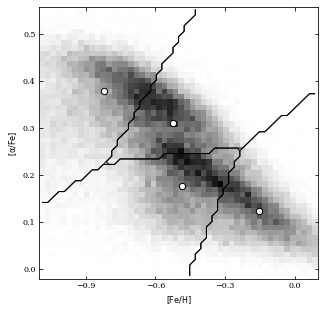

In [ ]:
"""
EM example: K-means
-------------------
Figure 6.13
The K-means analysis of the stellar metallicity data used in figure 6.6. Note
how the background distribution "pulls" the cluster centers away from the locus
where one would place them by eye. This is why more sophisticated models like
GMM are often better in practice.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

from sklearn.cluster import KMeans
from sklearn import preprocessing

from astroML.datasets import fetch_sdss_sspp

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Get data
data = fetch_sdss_sspp(cleaned=True)
X = np.vstack([data['FeH'], data['alphFe']]).T

# truncate dataset for speed
X = X[::5]

#------------------------------------------------------------
# Compute a 2D histogram  of the input
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'], 50)

#------------------------------------------------------------
# Compute the KMeans clustering
n_clusters = 4

scaler = preprocessing.StandardScaler()
clf = KMeans(n_clusters)
clf.fit(scaler.fit_transform(X))

#------------------------------------------------------------
# Visualize the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot()

# plot density
ax = plt.axes()
ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)

# plot cluster centers
cluster_centers = scaler.inverse_transform(clf.cluster_centers_)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1],
           s=40, c='w', edgecolors='k')

# plot cluster boundaries
FeH_centers = 0.5 * (FeH_bins[1:] + FeH_bins[:-1])
alphFe_centers = 0.5 * (alphFe_bins[1:] + alphFe_bins[:-1])

Xgrid = np.meshgrid(FeH_centers, alphFe_centers)
Xgrid = np.array(Xgrid).reshape((2, 50 * 50)).T

H = clf.predict(scaler.transform(Xgrid)).reshape((50, 50))

for i in range(n_clusters):
    Hcp = H.copy()
    flag = (Hcp == i)
    Hcp[flag] = 1
    Hcp[~flag] = 0

    ax.contour(FeH_centers, alphFe_centers, Hcp, [-0.5, 0.5],
               linewidths=1, colors='k')

ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])

ax.set_xlabel(r'$\rm [Fe/H]$')
ax.set_ylabel(r'$\rm [\alpha/Fe]$')

plt.show()

## Clustering by Max-Radius Minimization: the Gonzalez Algorithm
An alternative to minimizing the sum of square errors is to minimize the maximum
radius of a cluster, 
$$min_k max_{x_i \in C_k} ||x_i − \mu_k ||$$,
where we assign one of the points within the data set to be the center of each cluster, $\mu_k$.

An effective algorithm for finding the cluster centroids is known as the Gonzalez algorithm. Starting with no clusters we progressively add one cluster at a time (by arbitrarily selecting a point within the data set to be the center of the cluster). We then find the point $x_i$ which maximizes the distance from the centers
of existing clusters and set that as the next cluster center. This procedure is repeated
until we achieve K clusters. At this stage each point in the data set is assigned the label of its nearest cluster center.

## Clustering by Nonparametric Density Estimation: Mean Shift
Another way to find arbitrarily shaped clusters is to define clusters in terms of the modes or peaks of the nonparametric density estimate, associating each data point with its closest peak. This so-called mean-shift algorithm is a technique to find local modes (bumps) in a kernel density estimate of the data. The concept behind mean shift is that we move the data points in the direction of the log of the gradient of the density of the data, until they finally converge to each other at the peaks of the bumps.The number of modes, K , is found implicitly by the method.

Suppose $x_i^m$ is the position of the i-th data point during iteration $m$ of the procedure. A kernel density estimate $\hat{f}^m$ m is constructed from the points {$x_i^m$}. We
obtain the next round of points according to an update procedure:

$$x_i^{m+1}=x_i^m+ a \nabla log \hat{f}^m(x_i^m) = x_i^m+ \frac{a}{\hat{f^m(x_i^m)}} \nabla \hat{f}^m(x_i^m)$$

where $\hat{f}^m(x_i^m)$ is found by kernel density estimation and $\nabla \hat{f}^m(x_i^m)$ is found by kernel density estimation using the gradient of the original kernel.

The convergence of this procedure is defined by the bandwidth, $h$, of the kernel
and the parametrization of $a$. For example, points drawn from a spherical Gaussian
will jump to the centroid in one step when $a$ is set to the variance of the Gaussian.
The log of the gradient of the density ensures that the method converges in a few iterations, with points in regions of low density moving a considerable distance toward regions of high density in each iteration.

For the Epanechnikov kernel and the value
$a=\frac{h^2}{D+2}$

the update rule reduces to the form

$x_i^{m+1}= $mean position of points $x_i^m$ within distance $h$ of $x_i^m$

This is called the mean-shift algorithm

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


[-1  0  1]
0.4
number of estimated clusters : 2


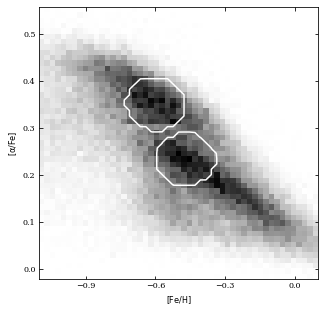

In [ ]:
"""
Mean Shift Example
------------------
Figure 6.14
Mean-shift clustering on the metallicity datas et used in figures 6.6 and 6.13.
The method finds two clusters associated with local maxima of the distribution
(interior of the circles). Points outside the circles have been determined to
lie in the background. The mean shift does not attempt to model correlation
in the clusters: that is, the resulting clusters are axis aligned.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function

import numpy as np
from matplotlib import pyplot as plt
from matplotlib.patches import Ellipse
from scipy.stats import norm

from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing

from astroML.datasets import fetch_sdss_sspp

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Get the data
np.random.seed(0)
data = fetch_sdss_sspp(cleaned=True)

# cut out some additional strange outliers
data = data[~((data['alphFe'] > 0.4) & (data['FeH'] > -0.3))]

X = np.vstack([data['FeH'], data['alphFe']]).T

#----------------------------------------------------------------------
# Compute clustering with MeanShift
#
# We'll work with the scaled data, because MeanShift finds circular clusters

X_scaled = preprocessing.scale(X)

# The following bandwidth can be automatically detected using
# the routine estimate_bandwidth().  Because bandwidth estimation
# is very expensive in memory and computation, we'll skip it here.

#bandwidth = estimate_bandwidth(X)
bandwidth = 0.4

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True, cluster_all=False)
ms.fit(X_scaled)

labels_unique = np.unique(ms.labels_)
n_clusters = len(labels_unique[labels_unique >= 0])
print(labels_unique)
print(bandwidth)
print("number of estimated clusters :", n_clusters)

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

# plot density
H, FeH_bins, alphFe_bins = np.histogram2d(data['FeH'], data['alphFe'], 51)

ax.imshow(H.T, origin='lower', interpolation='nearest', aspect='auto',
          extent=[FeH_bins[0], FeH_bins[-1],
                  alphFe_bins[0], alphFe_bins[-1]],
          cmap=plt.cm.binary)

# plot clusters
colors = ['b', 'g', 'r', 'k']

for i in range(n_clusters):
    Xi = X[ms.labels_ == i]
    H, b1, b2 = np.histogram2d(Xi[:, 0], Xi[:, 1], (FeH_bins, alphFe_bins))

    bins = [0.1]

    ax.contour(0.5 * (FeH_bins[1:] + FeH_bins[:-1]),
               0.5 * (alphFe_bins[1:] + alphFe_bins[:-1]),
               H.T, bins, colors='w')

ax.xaxis.set_major_locator(plt.MultipleLocator(0.3))
ax.set_xlim(-1.101, 0.101)
ax.set_ylim(alphFe_bins[0], alphFe_bins[-1])
ax.set_xlabel(r'$\rm [Fe/H]$')
ax.set_ylabel(r'$\rm [\alpha/Fe]$')

plt.show()

## Clustering Procedurally: Hierarchical Clustering
A procedural method is a method which has not been formally related to some
function of the underlying density. Such methods are more common in clustering and dimension reduction than in other tasks. Although this makes it hard, if not impossible, to say much about these methods analytically, they are nonetheless often still useful in practice.

Hierarchical clustering relaxes the need to specify the number of clusters $K$ by
finding all clusters at all scales. We start by partitioning the data into $N$ clusters, one
for each point in the data set. We can then join two of the clusters resulting in $N − 1$
clusters. This procedure is repeated until the Nth partition contains one cluster. If
two points are in the same cluster at level m, and remain together at all subsequent
levels, this is known as hierarchical clustering and is visualized using a tree diagram
or dendrogram.

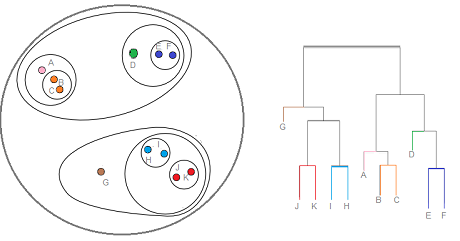

Hierarchical clustering can be approached as a top-down (divisive) procedure, where we progressively subdivide the data, or as a bottom-up (agglomerative) procedure, where we merge the nearest pairs of clusters. For our examples below we will consider the agglomerative approach at each step in the clustering process we merge the “nearest” pair of clusters.

At each step in the clustering process we merge the “nearest” pair of clusters.
Options for defining the distance between two clusters, $C_k$ and $C_k^{'}$, include

$$d_{min}(C_k, C_k^{'})=min_{x \in C_k, x^{'} \in C_k^{'}} ||x-x^{'}||$$
$$d_{max}(C_k, C_k^{'})=max_{x \in C_k, x^{'} \in C_k^{'}} ||x-x^{'}||$$
$$d_{avg}(C_k, C_k^{'})=$\frac{1}{N_k N_{k^{'}}} \sum_{x \in C_k} \sum_{x^{'} \in C_{k^{'}}} ||x-x^{'}||$$
$$d_{cen}(C_k, C_k^{'})=||\mu_k-\mu_{k^{'}}||$$

where $x$ and $x^{'}$are the points in cluster $C_k$ and $C_k^{'}$ respectively, $N_k$ and $N_k^{'}$ are the number of points in each cluster, and $\mu_k$ and $\mu_k^{'}$ the centroid of the clusters.

Using the distance $d_{min}$ results in a hierarchical clustering known as a minimum
spanning tree, see https://academic.oup.com/mnras/article/278/3/869/953149 and will commonly
produce clusters with extended chains of points. 

Using $d_{max}$ tends to produce hierarchical clustering with compact clusters. The other two distance examples have behavior somewhere between these two extremes.

For a single-linkage hierarchical
clustering this is also known as “friends-of-friends” clustering, and in astronomy
is often used in cluster analysis for N-body simulations. 


 scale: 3.54953 Mpc


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:93: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.


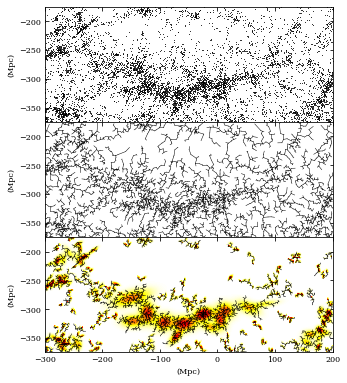

In [ ]:
"""
Euclidean Minimum Spanning Tree
-------------------------------
Figure 6.15
An approximate Euclidean minimum spanning tree over the two-dimensional
projection of the SDSS Great Wall. The upper panel shows the input points, and
the middle panel shows the dendrogram connecting them. The lower panel shows
clustering based on this dendrogram, created by removing the largest 10% of the
graph edges, and keeping the remaining connected clusters with 30 or more
members.
Additional information
~~~~~~~~~~~~~~~~~~~~~~
This figure is based on the data presented in Figure 1 of Cowan & Ivezic
(2008). A similar figure appears in the book
"Statistics, Data Mining, and Machine Learning in Astronomy", by
Ivezic, Connolly, Vanderplas, and Gray (2013).
The three panels of this figure show a hierarchical clustering of a subset
of galaxies from the Sloan Digital Sky Survey (SDSS).  This region is known
as the "SDSS Great Wall", and contains an extended cluster of several thousand
galaxies approximately 300Mpc (about 1 billion light years) from earth.  The
top panel shows the positions of over 8,000 galaxies projected to a 2D plane
with Earth at the point (0, 0).  The middle panel shows a dendrogram
representation of a Euclidean Minimum Spanning Tree (MST) over the galaxy
locations.  By eliminating edges of a MST which are greater than a given
length, we can measure the amount of clustering at that scale: this is one
version of a class of models known as Hierarchical Clustering.  The bottom
panel shows the results of this clustering approach for an edge cutoff of
3.5Mpc, along with a Gaussian Mixture Model fit to the distribution within
each cluster.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from scipy import sparse
from sklearn.mixture import GaussianMixture

from astroML.clustering import HierarchicalClustering, get_graph_segments
from astroML.datasets import fetch_great_wall

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# get data
X = fetch_great_wall()

xmin, xmax = (-375, -175)
ymin, ymax = (-300, 200)

#------------------------------------------------------------
# Compute the MST clustering model
n_neighbors = 10
edge_cutoff = 0.9
cluster_cutoff = 10
model = HierarchicalClustering(n_neighbors=10,
                               edge_cutoff=edge_cutoff,
                               min_cluster_size=cluster_cutoff)
model.fit(X)
print(" scale: %2g Mpc" % np.percentile(model.full_tree_.data,
                                        100 * edge_cutoff))

n_components = model.n_components_
labels = model.labels_

#------------------------------------------------------------
# Get the x, y coordinates of the beginning and end of each line segment
T_x, T_y = get_graph_segments(model.X_train_,
                              model.full_tree_)
T_trunc_x, T_trunc_y = get_graph_segments(model.X_train_,
                                          model.cluster_graph_)

#------------------------------------------------------------
# Fit a GaussianMixture to each individual cluster
Nx = 100
Ny = 250
Xgrid = np.vstack(map(np.ravel, np.meshgrid(np.linspace(xmin, xmax, Nx),
                                            np.linspace(ymin, ymax, Ny)))).T
density = np.zeros(Xgrid.shape[0])

for i in range(n_components):
    ind = (labels == i)
    Npts = ind.sum()
    Nclusters = min(12, Npts // 5)
    gmm = GaussianMixture(Nclusters, random_state=0).fit(X[ind])
    dens = np.exp(gmm.score_samples(Xgrid))
    density += dens / dens.max()

density = density.reshape((Ny, Nx))

#----------------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 6))
fig.subplots_adjust(hspace=0, left=0.1, right=0.95, bottom=0.1, top=0.9)

ax = fig.add_subplot(311, aspect='equal')
ax.scatter(X[:, 1], X[:, 0], s=1, lw=0, c='k')
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)')

ax = fig.add_subplot(312, aspect='equal')
ax.plot(T_y, T_x, c='k', lw=0.5)
ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.set_ylabel('(Mpc)')

ax = fig.add_subplot(313, aspect='equal')
ax.plot(T_trunc_y, T_trunc_x, c='k', lw=0.5)
ax.imshow(density.T, origin='lower', cmap=plt.cm.hot_r,
          extent=[ymin, ymax, xmin, xmax])

ax.set_xlim(ymin, ymax)
ax.set_ylim(xmin, xmax)
ax.set_xlabel('(Mpc)')
ax.set_ylabel('(Mpc)')

plt.show()

# Correlation Functions
In earlier sections we described the search for structure within point data using
density estimation  and cluster identification.
 For point processes, a popular extension to these ideas is the use of correlation functions to characterize how far (and on what scales) the distribution of points differs from a random
distribution; see Peebles (1980). Correlation functions, and in particular autocorrelation
functions, have been used extensively throughout astrophysics with examples of their
use including the characterization of the fluctuations in the densities of galaxies and
quasars as a function of luminosity, galaxy type and age of the universe. The key aspect of these statistics is that they can be used as metrics for testing models of structure formation and evolution directly against data.

We can define the correlation function by noting that the probability of finding a point in a volume element, $dV$, is directly proportional to the density of points, $\rho$. The probability of finding a pair of points in two volume elements, $dV_1$ and $dV_2$ ,
separated by a distance, $r$ is then given by

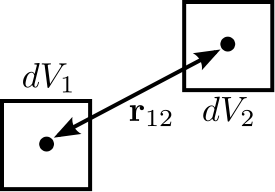

$$dP_{12}=\rho^2 dV_1 dV_2 (1+\xi(r))$$

where $\xi(r)$ is known as the two-point correlation function.

From this definition, we see that the two-point correlation function describes the excess probability of finding a pair of points, as a function of separation, compared to a random distribution. Positive, negative, or zero amplitudes in $\xi(r)$ correspond
to distributions that are respectively correlated, anticorrelated or random. The two-
point correlation function relates directly to the power spectrum, $P(k)$, through the
Fourier transform:

$$\xi(r)=\frac{1}{2\pi} \int dk k^2 P(k) \frac{sin(kr)}{kr}$$

with the scale or wavelength of a fluctuation, $\lambda$ is related to the wave number $k$ by
$k = 2\pi/\lambda$. As such, the correlation function can be used to describe the density
fluctuations of sources by

$$\xi(r)=<\frac{d\rho(x)}{\rho}\frac{d\rho(x+r)}{\rho}>$$

where $d\rho(x)/\rho = (\rho − \bar{rho})/ \bar{\rho}$ is the density contrast, relative to the mean value $\bar{\rho}$ at position $x$.
In studies of galaxy distributions, $\xi(r)$ is often parametrized in terms of a power law:

$$\xi(r)=(\frac{r}{r_0})^{-\gamma}$$

where $r_0$ is the clustering scale length and $\gamma$ the power law exponent (with $r_0 \sim
6$ Mpc and $\gamma \sim 1.8$ for galaxies in the local universe). Rather than considering the
full three-dimensional correlation function, we often desire instead to look at the angular correlation function of the apparent positions of objects on the sky. In this case, the approximate form of the relation is given by

$$w(\theta)=(\frac{\theta}{\theta_0})^{\delta}$$

where $\delta=1-\gamma$ (Limber equation).

Correlation functions can be extended to orders higher than the two-point function by considering configurations of points that comprise triplets (three-point function), quadruplets (four-point function), and higher multiplicities (n-point functions). 

Analogously to the definition of the two-point
function, we can express these higher-order correlation functions in terms of the
probability of finding a given configuration of points. For example, for the three-
point correlation function we define the probability $dP_{123}$ of finding three points in
volume elements $dV_1 , dV_2$ , and $dV_3$ that are defined by a triangle with sides $r_{12}$ , $r_{13}$ , $r_{23}$ . We write the three-point correlation function as

$$dP_{123}=\rho^3dV_1 dV_2 dV_3(1+\xi(r_{12})+\xi(r_{23})+\xi(r_{13})+\zeta(r_{12},r_{23},r_{13}))$$

with $\zeta$ known as the reduced or connected three-point correlation function (i.e., it
does not depend on the lower-order correlation functions). The additional two-point
correlation function terms in eq. 6.43 simply reflect triplets that arise from the excess
of pairs of galaxies due to the nonrandom nature of the data.

## Computing the n-point Correlation Function

For simplicity, we start with the two-point correlation function, $\xi(r)$, which can be estimated by calculating the excess or deficit of pairs of points within a distance $r$ and $r + dr $compared to a random distribution.
These random points are generated with the same selection function as the data (i.e., within the same volume and with identical masked regions)—the random data represent a Monte Carlo integration of the window function of the data.

Typically the random data have a density $\sim 20$ times higher than that of the data
(to ensure that the shot noise of the randoms does not contribute to the variance of
the estimator). This means that the computational cost of estimating the correlation
function is dominated by the size of the random data set.

If we write the number of pairs of data points as $DD(r)$, the number of pairs of
random points as $RR(r)$ and the number of data-random pairs as $DR(r)$, then we
can write an estimator of the two-point correlation function as:

$$\xi(r)= \frac{DD(r)}{RR(r)}-1$$

Edge effects, due to the interaction between the distribution of sources and the
irregular survey geometry in which the data reside, bias estimates of the correlation
function. Other estimators have been proposed which have better variance and are
less sensitive to edge effects than the classic estimator. One example is the Landy–Szalay estimator:

$$\xi(r)=\frac{DD(R)-2DR(r)+RR(r)}{RR(r)}$$

he Landy–Szalay estimator can be extended to higher-order correlation func-
tions (see https://arxiv.org/abs/astro-ph/9704241). For the three-point function this results in:


$$\xi(r)=\frac{DDD(r)-3DDR(r)+DRR(r)-RRR(r)}{RRR(r)}$$

where $DDD(r)$ represents the number of data triplets as defined by the triangular
configuration and $DDR(r), DRR(r)$, and
$RRR(r)$ are the associated configurations for the data-data-random, data-random- random, and random-random-random triplets, respectively. This equation is specified for an equilateral triangle configuration (i.e., all internal angles are held constant and the triangle configuration depends only on r ). For more general triangular configurations, $DDD(r)$ and other terms depend on the lengths of all
three sides of the triangle, or on the lengths of two sides and the angle between them.

data size:
  red gals:  38017
  blue gals: 16883
@pickle_results: computing results and saving to 'correlation_functions.pkl'


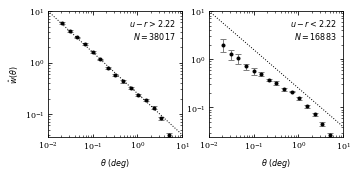

In [ ]:
"""
Angular Two-point Correlation Function
--------------------------------------
Figure 6.17
The two-point correlation function of SDSS spectroscopic galaxies in the range
0.08 < z < 0.12, with m < 17.7. This is the same sample for which the
luminosity function is computed in figure 4.10. Errors are estimated using ten
bootstrap samples. Dotted lines are added to guide the eye and correspond to a
power law proportional to :math:`\theta^{-0.8}`. Note that the red galaxies
(left panel) are clustered more strongly than the blue galaxies (right panel).
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general

from __future__ import print_function, division

import numpy as np
from matplotlib import pyplot as plt

from astroML.utils.decorators import pickle_results
from astroML.datasets import fetch_sdss_specgals
from astroML.correlation import bootstrap_two_point_angular

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Get data and do some quality cuts
data = fetch_sdss_specgals()
m_max = 17.7

# redshift and magnitude cuts
data = data[data['z'] > 0.08]
data = data[data['z'] < 0.12]
data = data[data['petroMag_r'] < m_max]

# RA/DEC cuts
RAmin, RAmax = 140, 220
DECmin, DECmax = 5, 45
data = data[data['ra'] < RAmax]
data = data[data['ra'] > RAmin]
data = data[data['dec'] < DECmax]
data = data[data['dec'] > DECmin]

ur = data['modelMag_u'] - data['modelMag_r']
flag_red = (ur > 2.22)
flag_blue = ~flag_red

data_red = data[flag_red]
data_blue = data[flag_blue]

print("data size:")
print("  red gals: ", len(data_red))
print("  blue gals:", len(data_blue))


#------------------------------------------------------------
# Set up correlation function computation
#  This calculation takes a long time with the bootstrap resampling,
#  so we'll save the results.
@pickle_results("correlation_functions.pkl")
def compute_results(Nbins=16, Nbootstraps=10,  method='landy-szalay', rseed=0):
    np.random.seed(rseed)
    bins = 10 ** np.linspace(np.log10(1 / 60.), np.log10(6), 16)

    results = [bins]
    for D in [data_red, data_blue]:
        results += bootstrap_two_point_angular(D['ra'],
                                               D['dec'],
                                               bins=bins,
                                               method=method,
                                               Nbootstraps=Nbootstraps)

    return results

(bins, r_corr, r_corr_err, r_bootstraps,
 b_corr, b_corr_err, b_bootstraps) = compute_results()

bin_centers = 0.5 * (bins[1:] + bins[:-1])

#------------------------------------------------------------
# Plot the results
corr = [r_corr, b_corr]
corr_err = [r_corr_err, b_corr_err]
bootstraps = [r_bootstraps, b_bootstraps]
labels = ['$u-r > 2.22$\n$N=%i$' % len(data_red),
          '$u-r < 2.22$\n$N=%i$' % len(data_blue)]

fig = plt.figure(figsize=(5, 2.5))
fig.subplots_adjust(bottom=0.2, top=0.9,
                    left=0.13, right=0.95)

for i in range(2):
    ax = fig.add_subplot(121 + i, xscale='log', yscale='log')

    ax.errorbar(bin_centers, corr[i], corr_err[i],
                fmt='.k', ecolor='gray', lw=1)

    t = np.array([0.01, 10])
    ax.plot(t, 10 * (t / 0.01) ** -0.8, ':k', linewidth=1)

    ax.text(0.95, 0.95, labels[i],
            ha='right', va='top', transform=ax.transAxes)
    ax.set_xlabel(r'$\theta\ (deg)$')
    if i == 0:
        ax.set_ylabel(r'$\hat{w}(\theta)$')


plt.show()

The naive computational scaling of the n-point correlation function, where we evaluate all permutations of points, is $O(N^n)$ (with N the size of the data and n the order of the correlation function). For large samples of points, the computational expense of this operation can become prohibitive. 
Space-partitioning trees can reduce this computational burden to $O(N log n )$.

The underlying concept behind these efficient tree-based correlation function algorithms is the exclusion or pruning of regions of data that do not match the configuration of the correlation function (e.g., for the two-point function, pairs of points that lie outside of the range $r$ to $r + dr$ ). By comparing the minimum and maximum pairwise distances between the bounding boxes of two nodes of a tree
we can rapidly identify and exclude those nodes (and all child nodes) that do not
match the distance constraints. This dramatically reduces the number of pairwise
calculations.

A number of public implementations of tree-based correlation functions are available that utilize these techniques. These include applications optimized for single processors  and for parallel systems.

https://arxiv.org/abs/1812.05995

# Which Density Estimation and Clustering Algorithms Should I Use?

In this section, we will touch upon many of the broad issues in the “art” (as opposed to
“science”) of machine learning (ML), and therefore our discussions are necessarily
subjective, incomplete, and cursory. However we hope this summary of unsupervised methods introduced in this chapter can serve as a springboard into the practice of ML.

We can define four axes of practical “goodness” along which one can place each machine learning method that we have described in this chapter, as well as each method in subsequent chapters:

- Accuracy: How well can it make accurate predictions or model data?

- Interpretability: How easy is it to understand why the model is making the
predictions that it does, or reason about its behavior?

- Simplicity: Is the model “fiddly,” that is, does it have numerous parameters
that must be tuned and tweaked with manual effort? Is it difficult to program?

- Speed: Is the method fast, or is it possible via sophisticated algorithms to make
it fast without altering its accuracy or other properties?

**What are the most accurate unsupervised methods?** Generally speaking, the more
parameters a model has, the more flexibility it has to fit complex functions, thus
reducing error. Consider first the task of density estimation, where the error in
question is some notion of the difference between the true underlying probability
density function and the estimated function. One broad division that can be made is
between parametric and nonparametric methods. Parametric methods find the best
model within a parametric model class, that is, one with a fixed number of model parameters. A Gaussian, or a mixture of k Gaussians, and the augmented mixture of Gaussians represented by the extreme deconvolution method are examples of
a parametric model for density estimation. If the true underlying function is not
a member of the chosen model class, even the model with the best setting of its
parameters simply cannot fit the data. Nonparametric methods conceptually have
a number of parameters that grows in some way as the number of data points N grows. Kernel density estimation is the standard nonparametric approach for density estimation in higher dimensions. Such methods can be shown to be able to fit virtually any underlying function (under very mild assumptions on the function). In general, achieving the highest accuracies requires nonparametric methods.
Note that while a mixture model (such as a mixture of Gaussians) is parametric
for a fixed number of mixture components, in principle if that number is chosen
in a way that can grow with N, such a model becomes nonparametric (e.g., when
modeling the underlying density we can use many more components than suggested
by criteria such as BIC). In practice, due to the complication and computational cost
of trying every possible number of parameters, ad hoc approaches are typically used
to decide the number of parameters for such models, making their status along the
parametric–nonparametric scale murkier.
For the task of clustering, parametric-style options include K -means and
max-radius minimization. In practice, the various heuristic procedures that are
used to determine the number of clusters K often place them arguably in the aforementioned murky regime. Mean shift, being based on kernel density estimation,
is a nonparametric method in spirit, though its final step is typically similar to K -
means. Hierarchical clustering is also nonparametric in spirit, in that it finds clusters
at all scales, possibly O(N) clusters. While density estimation methods have been
studied in great mathematical detail, the analogous formal statements one can make
for clustering methods (e.g., regarding whether the true underlying cluster structure
is recovered by a method, and if so, at what convergence rate, etc.) are much scarcer,
making it difficult to speak precisely about the accuracy of clustering methods in
general.

**What are the most interpretable methods?** All of the methods we have described
have the concept of a “distance” underneath them, which arguably makes them all
fairly intuitive. For density estimation, mixtures of Gaussians and kernel density
estimation are based on functions of Euclidean distance. For clustering, K -means,
max-radius minimization, and mean shift are all based on the Euclidean distance,
while hierarchical clustering uses Euclidean distance as the base notion of similarity
between points and thereafter uses some distance-like notion of similarity between
clusters.

The question of interpretability, in the context of many unsupervised methods, ventures into the question of validity. In clustering, as we have already touched upon, this issue is particularly acute. Most of the clustering methods, at least, can be understood as the solutions to optimization problems, that is, they find the
clusterings that are optimal under some score function for clusterings. Then the
clusters are valid or invalid depending on one’s assessment of whether the particular
score function is sensible. Hierarchical clustering is more opaque in this regard—we
do not have the same sense in which the clusters it finds are the “right” ones because
it is simply a procedure that begins and ends, but does not necessarily optimize any
clear score function.

Among density estimation methods, the nonparametric one, kernel estimation,
is perhaps the least straightforward in the sense of understanding why it works. It is in
a certain sense easy to understand as a smoothing of the data by adding up “blurred”
versions of the points, in the form of miniature pdfs, rather than delta functions.
However, understanding why this simple method yields a legitimate nonparametric
estimator of the true underlying density requires a leap into the mathematics of
asymptotic statistics.

** What are the most scalable unsupervised methods?** Max-radius minimization is
generally the most efficient of the methods discussed in this chapter, requiring only K
passes over the N points. K-means, for a single run (corresponding to one setting of
the initial parameters and K), is quite efficient, requiring some number of iterations
over the N points which is typically in the tens or hundreds. Computing Gaussian mixtures is similar to computing K -means, but each iteration is more expensive as it
involves, among other things, inverting $D × D$ covariance matrices in the evaluations
of Gaussians. All of the aforementioned methods are fairly efficient because each of
the N points is somehow compared to K centroids, and K is generally small, making
them scale as $O(N)$ per iteration with some unknown number of iterations. Kernel
density estimation is similar except that the $K$ is now replaced by $N$, making the
computational cost quadratic in $N$. Mean shift, being based on KDE, is quadratic as
well, and hierarchical clustering is even worse, becoming as bad as $O(N^3)$ depending
on the variant. Depending on the order of the statistic, n-point correlation functions
are quadratic, cubic, etc. in N.

** What are the simplest unsupervised methods to use?** Max-radius minimization, not a usual staple of machine learning books, is interesting in part because of its simplicity. K -means is also one of the simplest machine learning methods to implement. Gaussian mixtures represent a step up in complexity, introducing probabilities, matrix inversions, and the resulting numerical issues. We will characterize all of these methods as somewhat “fiddly,” meaning that they are not easily automatable—
one must typically fiddle with the critical parameter(s), in this case K , and look
at the results of many runs for each K tried, due to the fact that any particular
run from an initial random starting point of the parameters may not achieve the
global optimum in general. In principle, model selection for any ML method can be
automated by performing cross-validation over the entire set of plausible values of
the critical parameter(s). It is more difficult in practice for these types of unsupervised problems because the best K typically does not jump out clearly from the resulting error curve

Extreme deconvolution is an example of a Bayesian formulation of a standard
ML method, in this case Gaussian mixtures. Standard ML methods, by and large, are
frequentist, though for most common ones there have been Bayesianization attempts
with various degrees of practical success. Broadly speaking, performing ML in a
strictly Bayesian manner involves the highest amount of fiddliness for any problem,
because the notion of priors adds extra distributional choices, at a minimum,
generally with parameters that are explicitly not chosen in an automated data-driven
manner, but by definition manually. Though simple to implement, at least at a
baseline level, MCMC as a general computational workhorse adds significantly to the
amount of fiddliness due to the ever-present difficulty in being sure that the Markov
chain has converged, leading to many runs with different starting points and MCMC
parameter settings, and frequently manual examination of the samples produced.

Bayesian formulations of ML methods, extreme deconvolution being an example, which pose learning as optimization problems rather than using MCMC, can reduce this aspect of fiddliness.
Kernel density estimation, though representing an increase in statistical expressiveness over Gaussian mixtures, is simpler in that there is no parameter fitting at all, and only requires varying its critical parameter, the bandwidth h. Mean shift requires KDE-like steps in its optimization iterations, followed typically by K -means, putting it in the fiddly category. Hierarchical clustering is arguably both more powerful and simpler than methods like K-means that require selection of K because it finds
clustering at all scales, with no parameter fitting or random initializations, finding
the same clusters each time it is run.



In [ ]:
 
!pip install astroML

     |████████████████████████████████| 112kB 2.7MB/s 
  Created wheel for astroML: filename=astroML-0.4.1-cp36-none-any.whl size=128663 sha256=3aaccb1999407815a9e4dc86d79d5467e67e30f5bd3adbb3260c213b9be8f289
  Stored in directory: /root/.cache/pip/wheels/7c/f2/f3/eb817cfb31b4445358dd7dda2434e02003f72801edabc38c97
Successfully built astroML
